# Raw Extraction of required data

Note that the raw extraction of required data takes a very long time, the import of pre-computed values is avaliable at the Plotting Code section.

In [4]:
import pandas as pd
import numpy as np
import tqdm
import csv
from datetime import datetime

In [5]:
# Defining the list indexes
indexes = {
    'Malware':0,
    'Phishing':1,
    'Exploits':2,
    'Fraudlent Services':3,
    'Unwanted Programs':4,
    'Spammers':5,
    'Unlabelled':6,
}

attack_map = ['Malware', 'Phishing', 'Exploits', 'Fraudlent Services',
            'Unwanted Programs', 'Spammers', 'Unlabelled']

In [3]:
# Convert date fields back into a python date object
date_calculation_cache = {}
def make_date(day, month, year, iso=True):
    date = '%s-%s-%s' % (day, month, year)
    # Check cache before recomputation
    if date not in date_calculation_cache:
        if iso:
            cal = datetime.strptime(date, "%d-%m-%Y").isocalendar()
        else:
            cal = datetime.strptime(date, "%d-%m-%Y")
        date_calculation_cache[date] = cal
    else:
        cal = date_calculation_cache[date]
    return cal

In [7]:
# Initialise a dictionary to hold all our data.
# We will later convert this into a pandas dataframe for easy processing
ip_in_cc = {}

for attack in indexes:
    print(attack)
    files = []
    if attack == 'Unlabelled':
        # There are 23 files containing Unlabelled reports
        for i in range(23):
            files.append(('./../../Datastore/%s_reports_%s.csv'%(attack,i), attack, i))
    else:
        #continue
        files.append(('./../../Datastore/%s_reports.csv'%attack, attack, None))
    #########################
    
    # Process the files
    for file_name, a, file_num in files:
        print(file_name)
        with open(file_name) as data_file:
            filereader = csv.reader(data_file)
            if attack == 'Unlabelled':
                activity_relabel = pd.read_csv('./../../Unlabelled_predictions/%s_predictions_%s.csv'%(a, file_num),
                                               index_col=[0], header=None)
                activity_relabel = activity_relabel.transpose().values[0]
            for n, report in enumerate(tqdm.tqdm(filereader)):
                try:
                    # Unpack Row information
                    splits = report[0:9]

                    day = splits[5]
                    month = splits[6]
                    year = splits[7]
                    datasource = splits[8]        
                    org = splits[3]
                    asn = splits[2]
                    cc = splits[1]
                    ip = splits[0]
                    
                    # Compute week bins
                    cal = make_date(day, month, year, iso=False)
                    year_num, week_num, weekday_num = cal.isocalendar()

                    # Invalid Timestamp, likely 0.
                    if year_num == 1970:
                        continue
                    week = (year_num-1970)*52 + week_num

                except Exception, e: 
                    print(str(e))

                if ip is None or ip == '':
                    print("Skipping invalid IP: %s" % ip)
                    continue

                if (attack == 'Unlabelled'):
                    attack_label = attack_map[activity_relabel[n]]
                else:
                    attack_label = attack

                # Initialise the holders
                key = cc
                if key not in ip_in_cc:
                    ip_in_cc[key] = {}

                if attack_label not in ip_in_cc[key]:
                    ip_in_cc[key][attack_label] = set([])
                    
                # Add IP to country set
                ip_in_cc[key][attack_label].add(ip)

print('Finished')

6918it [00:00, 66180.09it/s]
0it [00:00, ?it/s]

Spammers
./../../Datastore/Spammers_reports.csv
Malware
./../../Datastore/Malware_reports.csv


3190529it [00:21, 149157.64it/s]
12764it [00:00, 127600.27it/s]

Exploits
./../../Datastore/Exploits_reports.csv


201108it [00:01, 137425.92it/s]
14057it [00:00, 140529.26it/s]

Phishing
./../../Datastore/Phishing_reports.csv


2382889it [00:16, 142281.42it/s]
14875it [00:00, 148716.10it/s]

Fraudlent Services
./../../Datastore/Fraudlent Services_reports.csv


829301it [00:05, 146258.23it/s]
13423it [00:00, 134149.53it/s]

Unwanted Programs
./../../Datastore/Unwanted Programs_reports.csv


698700it [00:04, 149699.41it/s]


Unlabelled
./../../Datastore/Unlabelled_reports_0.csv


/Users/zha197/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
2000138it [00:13, 145277.45it/s]


./../../Datastore/Unlabelled_reports_1.csv


2000007it [00:15, 132163.51it/s]


./../../Datastore/Unlabelled_reports_2.csv


2000047it [00:15, 133165.94it/s]


./../../Datastore/Unlabelled_reports_3.csv


2000022it [00:17, 112398.72it/s]


./../../Datastore/Unlabelled_reports_4.csv


2000471it [00:15, 129790.62it/s]


./../../Datastore/Unlabelled_reports_5.csv


2000567it [00:15, 131855.05it/s]


./../../Datastore/Unlabelled_reports_6.csv


2000130it [00:13, 145562.93it/s]


./../../Datastore/Unlabelled_reports_7.csv


2000541it [00:13, 153393.04it/s]


./../../Datastore/Unlabelled_reports_8.csv


2000282it [00:13, 151900.65it/s]


./../../Datastore/Unlabelled_reports_9.csv


2000016it [00:14, 139553.00it/s]


./../../Datastore/Unlabelled_reports_10.csv


2000165it [00:17, 115928.76it/s]


./../../Datastore/Unlabelled_reports_11.csv


2000021it [00:13, 145817.38it/s]


./../../Datastore/Unlabelled_reports_12.csv


2000114it [00:15, 130180.35it/s]


./../../Datastore/Unlabelled_reports_13.csv


2000038it [00:19, 100647.51it/s]


./../../Datastore/Unlabelled_reports_14.csv


2000304it [00:17, 113206.55it/s]


./../../Datastore/Unlabelled_reports_15.csv


2000019it [00:14, 136483.41it/s]


./../../Datastore/Unlabelled_reports_16.csv


2000455it [00:15, 131389.44it/s]


./../../Datastore/Unlabelled_reports_17.csv


2000040it [00:13, 149315.42it/s]


./../../Datastore/Unlabelled_reports_18.csv


2000023it [00:13, 152335.11it/s]


./../../Datastore/Unlabelled_reports_19.csv


2000058it [00:15, 132412.66it/s]


./../../Datastore/Unlabelled_reports_20.csv


2000016it [00:15, 128058.33it/s]


./../../Datastore/Unlabelled_reports_21.csv


2000294it [00:15, 128338.55it/s]
0it [00:00, ?it/s]

./../../Datastore/Unlabelled_reports_22.csv


332782it [00:02, 124686.20it/s]

Finished


## Compute Unique IPs

In [32]:
cc_uniq_ips = {}
cc_exceptions = ['--', 'xx', 'A1', 'unknown', 'nan']

for cc in ip_in_cc:
    if cc in cc_exceptions:
        continue
        
    for attack in ip_in_cc[cc]:
        if cc not in cc_uniq_ips:
            cc_uniq_ips[cc] = {}
            cc_uniq_ips[cc]['Totals'] = 0
        cc_uniq_ips[cc][attack] = len(ip_in_cc[cc][attack])
        cc_uniq_ips[cc]['Totals'] = cc_uniq_ips[cc]['Totals'] + cc_uniq_ips[cc][attack]


In [ ]:
import pandas as pd
cc_ip_unique_df = pd.DataFrame(cc_uniq_ips)
cc_ip_unique_df = cc_ip_unique_df.fillna(0)

cc_ip_unique_df.to_csv("cc_ip_unique.csv")

cc_ip_unique_df

## Compute Proportions

In [33]:
# Import the cc block sizes from the other generator script
import pandas as pd
cc_block_size = pd.read_csv('./Generators/country_block_sizes.csv', index_col=[0])
cc_block_size = cc_block_size.to_dict()['0']

In [34]:
# Compute the porportions
cc_ip_porportion = {}
for cc in cc_uniq_ips:
    # See if we have a block size for this cc
    if cc not in cc_block_size:
        print cc
        continue
        
    # Retrieve the block size for cc
    cc_total = cc_block_size[cc]
    
    # For all recorded attacks, compute a porportion
    for attack in cc_uniq_ips[cc]:
        if cc not in cc_ip_porportion:
            cc_ip_porportion[cc] = {}
        cc_ip_porportion[cc][attack] = 100 * float(cc_uniq_ips[cc][attack])/cc_total

ZZ
UK
NA
XK


In [35]:
import pandas as pd
cc_ip_porportion_df = pd.DataFrame(cc_ip_porportion)
cc_ip_porportion_df = cc_ip_porportion_df.fillna(0)

cc_ip_porportion_df.to_csv("cc_attack_proportions.csv")

cc_ip_porportion_df

,AD,AE,AF,AG,AI,AL,AM,AN,AO,AR,...,UZ,VC,VE,VG,VN,VU,YE,ZA,ZM,ZW
Exploits,0.001948,0.002320,0.000000,0.000000,0.087719,0.000000,0.000160,0.000000,0.000000,0.000349,...,0.001594,0.00000,0.000059,0.178479,0.000409,0.000000,0.002856,0.000149,0.000000,0.000000
Fraudlent Services,0.000000,0.001008,0.000000,0.000000,0.009747,0.000530,0.000000,0.000000,0.000079,0.000318,...,0.001993,0.00000,0.000029,0.206621,0.000471,0.000000,0.000000,0.000302,0.000000,0.000000
Malware,0.019481,0.006051,0.016481,0.006923,0.477583,0.047187,0.045411,0.000323,0.000158,0.009494,...,0.014349,0.00331,0.008061,0.331038,0.094218,0.004706,0.012853,0.003202,0.000271,0.007448
Phishing,0.000000,0.001261,0.000000,0.000000,0.282651,0.000530,0.000481,0.000000,0.000000,0.001324,...,0.004384,0.00000,0.000206,0.171073,0.002068,0.000000,0.000000,0.000909,0.000181,0.000828
Spammers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,...,0.000000,0.00000,0.000000,0.075539,0.000019,0.000000,0.000000,0.000000,0.000000,0.000000
Total,0.021429,0.010715,0.016481,0.006923,0.886940,0.048247,0.046053,0.000323,0.000237,0.011589,...,0.022320,0.00331,0.008354,1.068651,0.097242,0.004706,0.015710,0.004707,0.000452,0.008276
Unwanted Programs,0.000000,0.000076,0.000000,0.000000,0.029240,0.000000,0.000000,0.000000,0.000000,0.000099,...,0.000000,0.00000,0.000000,0.105902,0.000057,0.000000,0.000000,0.000146,0.000000,0.000000


# Plotting Code

## Load Existing Data

In [7]:
import pandas as pd
cc_block_size = pd.read_csv('./Generators/country_block_sizes.csv', index_col=[0])
cc_block_size = cc_block_size.to_dict()['0']

cc_ip_porportion_df = pd.read_csv('cc_attack_proportions.csv', index_col=[0], header=[0])
cc_ip_unique_df = pd.read_csv('cc_ip_unique.csv', index_col=[0], header=[0])


## Highest Proportion CCs

In [8]:
import pandas as pd
ip_df = pd.DataFrame(cc_ip_porportion_df)
ip_df = ip_df.fillna(0)

top10 = ip_df.transpose()['Totals'].sort_values(ascending=False).head(10).index

names = ['Country','Proportion','Unique Malicious IPs','Total Block Size']

top_list = []
for one in top10:
    top_list.append((one, ip_df.transpose()['Totals'][one],
                     cc_ip_unique_df[one]['Totals'], cc_block_size[one]))

a = pd.DataFrame(top_list)
a.columns = names

a.set_index('Country')

,Proportion,Unique Malicious IPs,Total Block Size
Country,,,
VG,1.068651,1443.0,135030
AI,0.886940,91.0,10260
LT,0.183151,4928.0,2690680
BZ,0.180981,323.0,178472
MH,0.165720,14.0,8448
LU,0.158554,2318.0,1461964
UA,0.138821,17658.0,12719936
DM,0.109810,18.0,16392
FJ,0.103079,152.0,147460


## Plotting Parameters

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dateutil.relativedelta

plot_properties_indexes = {
    'Unwanted Programs':{'color':'b', 'linestyle':'-', 'label':'PUP',
                         'marker':'s', 'hatch':'//'},

    'Fraudlent Services':{'color':'y', 'linestyle':'-', 'label':'Fraud. Serv.',
                          'marker':'*','hatch':'\\'},

    'Malware':{'color':'r', 'linestyle':'-', 'label':'Malware',
               'marker':'x', 'hatch':'x'},

    'Exploits':{'color':'m', 'linestyle':'-', 'label':'Exploits',
                'marker':'+', 'hatch':'+'},

    'Phishing':{'color':'g', 'linestyle':'-', 'label':'Phishing',
                'marker':'^', 'hatch':'|'},

    'Spammers':{'color':'c', 'linestyle':'-', 'label':'Spammers',
                'marker':'D', 'hatch':'\\\\'},

    'Unlabelled':{'color':'w', 'linestyle':'-', 'label':'Unlabelled',
                  'marker':'T', 'hatch':'///'},

    'Totals':{'color':'k', 'linestyle':'-', 'label':'Total',
              'marker':'o', 'hatch':''}
}

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def cdf(data, m,n,s,lstring):
    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    #print counts
    #print bin_edges
    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    
    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf,linestyle='%s'%n, color='%s'%m,marker='%s'%s,markevery=0.1, label=lstring)    
    plt.ylim((0,1))

# CDF of CC Proportions

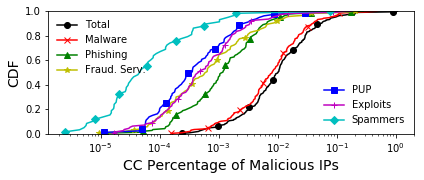

In [20]:
plt.figure(figsize=(6,2.6))

for attk in ['Totals', 'Malware', 'Phishing', 'Fraudlent Services', 'Unwanted Programs', 
             'Exploits', 'Spammers']:
    a = cc_ip_porportion_df.transpose()[attk][cc_ip_porportion_df.transpose()[attk]!=0]
    linestyle = plot_properties_indexes[attk]['linestyle']
    color = plot_properties_indexes[attk]['color']
    label = plot_properties_indexes[attk]['label']
    marker = plot_properties_indexes[attk]['marker']
    
    cdf(a, color, linestyle, marker, label)

plt.ylabel("CDF",fontsize=14)
plt.xlabel("CC Percentage of Malicious IPs",fontsize=14)

plt.xscale('log')

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# New Legend Code
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
offset_split = 4
l1 = ax.legend(handles[:offset_split], labels[:offset_split], loc='upper left',frameon=False)
l2 = ax.legend(handles[offset_split:], labels[offset_split:], loc='lower right',frameon=False) # this removes l1 from the axes.
ax.add_artist(l1)


plt.savefig("figures/cc_proportion_big.pdf",bbox_inches='tight')
plt.show()

In [24]:
print cc_block_size['US']
print cc_ip_unique_df['US']

1615708342
Exploits               22090
Fraudlent Services     55318
Malware               187648
Phishing               77902
Spammers                 968
Totals                485778
Unwanted Programs     141852
Name: US, dtype: int64


# Top 10s

In [14]:
7620/463488.0


0.01644055509527755

In [18]:
list(a.head(10)['Country'])

[u'NA', 'VG', 'AI', 'LT', u'BZ', u'MH', u'LU', u'UA', u'DM', u'FJ']

In [5]:
cc_ip_unique_df.loc['Totals'].mean()

4170.227272727273